## ResNet model:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os
import shutil
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input
import splitfolders
%matplotlib inline

In [2]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
PATH = r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book_master\224x224'

In [4]:
df_train = pd.read_csv(r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book30-listing-train.csv',encoding = "ISO-8859-1")
df_test = pd.read_csv(r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book30-listing-test.csv',encoding = "ISO-8859-1")

In [5]:
columns = ['id', 'image', 'link', 'name', 'author', 'class', 'genre']
df_train.columns = columns
df_test.columns = columns

In [6]:
df_train.head(10)

,id,image,link,name,author,class,genre
0,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books
1,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation
2,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles
3,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors
4,8436808053,8436808053.jpg,http://ecx.images-amazon.com/images/I/41aDW5pz...,"Como vencer el insomnio. Tecnicas, reglas y co...",Choliz Montanes,11,"Health, Fitness & Dieting"
5,1848291388,1848291388.jpg,http://ecx.images-amazon.com/images/I/51Lpg7xm...,John Martin Littlejohn: An Enigma of Osteopathy,John O'Brien,16,Medical Books
6,73402656,0073402656.jpg,http://ecx.images-amazon.com/images/I/51WccSzF...,Chemistry: The Molecular Nature of Matter and ...,Martin Silberberg,23,Science & Math
7,323045979,0323045979.jpg,http://ecx.images-amazon.com/images/I/51rJir5E...,Mosby's Oncology Nursing Advisor: A Comprehens...,Susan Newton MS RN AOCN AOCNS,16,Medical Books
8,1847176968,1847176968.jpg,http://ecx.images-amazon.com/images/I/61KoC743...,Ireland's Wild Atlantic Way,Carsten Krieger,29,Travel
9,1760342769,1760342769.jpg,http://ecx.images-amazon.com/images/I/515LqScy...,Lonely Planet Israel & the Palestinian Territo...,Lonely Planet,29,Travel


In [7]:
categories = df_train.genre.unique()
categories

array(["Children's Books", 'Engineering & Transportation',
       'Christian Books & Bibles', 'Sports & Outdoors',
       'Health, Fitness & Dieting', 'Medical Books', 'Science & Math',
       'Travel', 'Business & Money', 'Cookbooks, Food & Wine',
       'Politics & Social Sciences', 'Crafts, Hobbies & Home',
       'Religion & Spirituality', 'Literature & Fiction',
       'Humor & Entertainment', 'Law', 'Computers & Technology',
       'Test Preparation', 'Biographies & Memoirs', 'Arts & Photography',
       'Parenting & Relationships', 'Romance', 'History',
       'Comics & Graphic Novels', 'Reference', 'Teen & Young Adult',
       'Self-Help', 'Calendars', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense'], dtype=object)

In [8]:
classes = df_train['class'].unique()
classes

array([ 4, 10,  9, 26, 11, 16, 23, 29,  2,  7, 19,  8, 21, 15, 13, 14,  6,
       28,  1,  0, 18, 22, 12,  5, 20, 27, 25,  3, 24, 17], dtype=int64)

In [9]:
categories_label = dict()
for i in range(len(categories)):
    categories_label[categories[i]] = classes[i]

In [10]:
categories_label

{"Children's Books": 4,
 'Engineering & Transportation': 10,
 'Christian Books & Bibles': 9,
 'Sports & Outdoors': 26,
 'Health, Fitness & Dieting': 11,
 'Medical Books': 16,
 'Science & Math': 23,
 'Travel': 29,
 'Business & Money': 2,
 'Cookbooks, Food & Wine': 7,
 'Politics & Social Sciences': 19,
 'Crafts, Hobbies & Home': 8,
 'Religion & Spirituality': 21,
 'Literature & Fiction': 15,
 'Humor & Entertainment': 13,
 'Law': 14,
 'Computers & Technology': 6,
 'Test Preparation': 28,
 'Biographies & Memoirs': 1,
 'Arts & Photography': 0,
 'Parenting & Relationships': 18,
 'Romance': 22,
 'History': 12,
 'Comics & Graphic Novels': 5,
 'Reference': 20,
 'Teen & Young Adult': 27,
 'Self-Help': 25,
 'Calendars': 3,
 'Science Fiction & Fantasy': 24,
 'Mystery, Thriller & Suspense': 17}

In [11]:
len(df_train.name)

51299

In [12]:
df_train['name'].value_counts()

The Tibetan Book of the Dead                                                                                          4
2015 Metropolitan Maps Wall Calendar TF Publishing {jg}                                                               3
Dracula                                                                                                               3
Private Independent Schools                                                                                           3
Bankruptcy (University Casebook Series)                                                                               3
                                                                                                                     ..
Eyes to See: U.S. Volunteers in Nicaragua                                                                             1
Key West: Part II (Volume 2)                                                                                          1
E-Learning for Law Firms                

In [13]:
df_train.drop_duplicates(subset='name',inplace=True)

In [28]:
image_size = 64
batch_size = 32
epochs = 20

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.1
                                  )
#usar flow o organizar las categorias en carpetas?
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='data/train/', class_mode='categorical',
                                                    x_col = 'image', y_col = 'genre',
                                                    batch_size = batch_size, target_size=(image_size,image_size), 
                                                    subset = 'training', shuffle=True, seed=42)
validation_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='data/train/', class_mode='categorical',
                                                        x_col = 'image', y_col = 'genre',
                                                        batch_size = batch_size, target_size=(image_size,image_size),
                                                        subset = 'validation', shuffle = True, seed=42)
test_datagen = ImageDataGenerator(rescale=1./255)

Found 45900 validated image filenames belonging to 30 classes.
Found 5100 validated image filenames belonging to 30 classes.


In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2), #
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(30, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 16384)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
save_best = ModelCheckpoint(
filepath = 'conv.hdf5',
verbose=1, save_best_only=True
)

In [32]:
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data = validation_generator,\
                         validation_steps = validation_generator.samples // batch_size, epochs = epochs, callbacks=[save_best,early_stopping], verbose=2)

Epoch 1/20

Epoch 1: val_loss improved from inf to 3.30697, saving model to conv.hdf5
1434/1434 - 72s - loss: 3.3244 - accuracy: 0.0690 - val_loss: 3.3070 - val_accuracy: 0.0558 - 72s/epoch - 50ms/step
Epoch 2/20

Epoch 2: val_loss improved from 3.30697 to 3.21340, saving model to conv.hdf5
1434/1434 - 50s - loss: 3.1923 - accuracy: 0.1110 - val_loss: 3.2134 - val_accuracy: 0.0855 - 50s/epoch - 35ms/step
Epoch 3/20

Epoch 3: val_loss improved from 3.21340 to 3.19058, saving model to conv.hdf5
1434/1434 - 50s - loss: 3.1289 - accuracy: 0.1277 - val_loss: 3.1906 - val_accuracy: 0.0985 - 50s/epoch - 35ms/step
Epoch 4/20

Epoch 4: val_loss improved from 3.19058 to 3.16794, saving model to conv.hdf5
1434/1434 - 55s - loss: 3.0891 - accuracy: 0.1366 - val_loss: 3.1679 - val_accuracy: 0.1073 - 55s/epoch - 39ms/step
Epoch 5/20

Epoch 5: val_loss improved from 3.16794 to 3.10697, saving model to conv.hdf5
1434/1434 - 50s - loss: 3.0600 - accuracy: 0.1486 - val_loss: 3.1070 - val_accuracy: 0.131

In [ ]:
model.save("resnet trained.hdf5")

In [16]:
model = keras.models.load_model('resnet50.hdf5')

In [17]:
test_dir = r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book_master\224x224\test'

In [18]:
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test, directory='data/test/', class_mode='categorical',
                                                    x_col = 'image', y_col = 'genre', color_mode='rgb',
                                                    batch_size = 1, target_size=(224,224), 
                                                        shuffle=False, seed=42)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)

Found 5699 validated image filenames belonging to 30 classes.


C:\Users\batch-pc\AppData\Local\Temp\ipykernel_3672\3587398349.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator,steps = nb_samples)


In [20]:
print(model.evaluate(train_generator))

718/718 [==============================] - 294s 408ms/step - loss: 2.4139 - accuracy: 0.3229
[2.413939952850342, 0.32291939854621887]


In [21]:
print(model.evaluate(test_generator))

5699/5699 [==============================] - 58s 10ms/step - loss: 2.6893 - accuracy: 0.2539
[2.6892549991607666, 0.25390419363975525]


In [22]:
genres = df_train['genre'].unique()
genres

array(["Children's Books", 'Engineering & Transportation',
       'Christian Books & Bibles', 'Sports & Outdoors',
       'Health, Fitness & Dieting', 'Medical Books', 'Science & Math',
       'Travel', 'Business & Money', 'Cookbooks, Food & Wine',
       'Politics & Social Sciences', 'Crafts, Hobbies & Home',
       'Religion & Spirituality', 'Literature & Fiction',
       'Humor & Entertainment', 'Law', 'Computers & Technology',
       'Test Preparation', 'Biographies & Memoirs', 'Arts & Photography',
       'Parenting & Relationships', 'Romance', 'History',
       'Comics & Graphic Novels', 'Reference', 'Teen & Young Adult',
       'Self-Help', 'Calendars', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense'], dtype=object)

In [23]:
cat = list(genres)
cat

["Children's Books",
 'Engineering & Transportation',
 'Christian Books & Bibles',
 'Sports & Outdoors',
 'Health, Fitness & Dieting',
 'Medical Books',
 'Science & Math',
 'Travel',
 'Business & Money',
 'Cookbooks, Food & Wine',
 'Politics & Social Sciences',
 'Crafts, Hobbies & Home',
 'Religion & Spirituality',
 'Literature & Fiction',
 'Humor & Entertainment',
 'Law',
 'Computers & Technology',
 'Test Preparation',
 'Biographies & Memoirs',
 'Arts & Photography',
 'Parenting & Relationships',
 'Romance',
 'History',
 'Comics & Graphic Novels',
 'Reference',
 'Teen & Young Adult',
 'Self-Help',
 'Calendars',
 'Science Fiction & Fantasy',
 'Mystery, Thriller & Suspense']

In [24]:
y_test = []
for i in df_test.genre:
    ind = categories_label.get(i)
    y_test.append(ind)

In [25]:
pred_labels = np.argmax(predict, axis=1)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_prediction = predict
y_prediction = np.argmax (y_prediction, axis = 1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction)
print(result)

[[ 24   7   1  17  14   1  14   8   0  20  11   1   4   2   3   4   1   7
    1   7   2   8   7   9   4   0   4   6   1   2]
 [ 13  40   3   5   7   3   0   3   2   2   2   0  16   4   3   1   3  17
   10   7   0   6   7   3   6  11   9   1   5   1]
 [  9   6  20   2   3   2   1  18   0   9   4   2   4   0   6   3  15  13
    4   9   3   3   5   8   1  17   5   3  12   3]
 [  6   3   1  71  27   1   7   3   5  11   6   0   0   6   0   1   3   3
    2   0   0   8   1   5   6   1   5   2   1   5]
 [  4   5   1  14  87   0  17   0   1   2   8   0   4   3   0   2   1   3
    2   0   2   5   5   1   6   0   4   7   1   5]
 [  9   8   0   9  24   1  96   0   1   3   0   0   3   3   0   4   0   6
    1   0   0   4   0   1  12   0   2   2   0   1]
 [  4   0   7   2   3   2   0  69   0   5   9   1   2   4   2   1  14   3
    6   8   7   4   0  13   1   5   2   1  14   1]
 [  2   3   1   4  15   1   1   1  85  21   0   4   2   3   0   2   5   2
    7   2   1   7   3   1   0   6   3   2   4   2]


<AxesSubplot: >

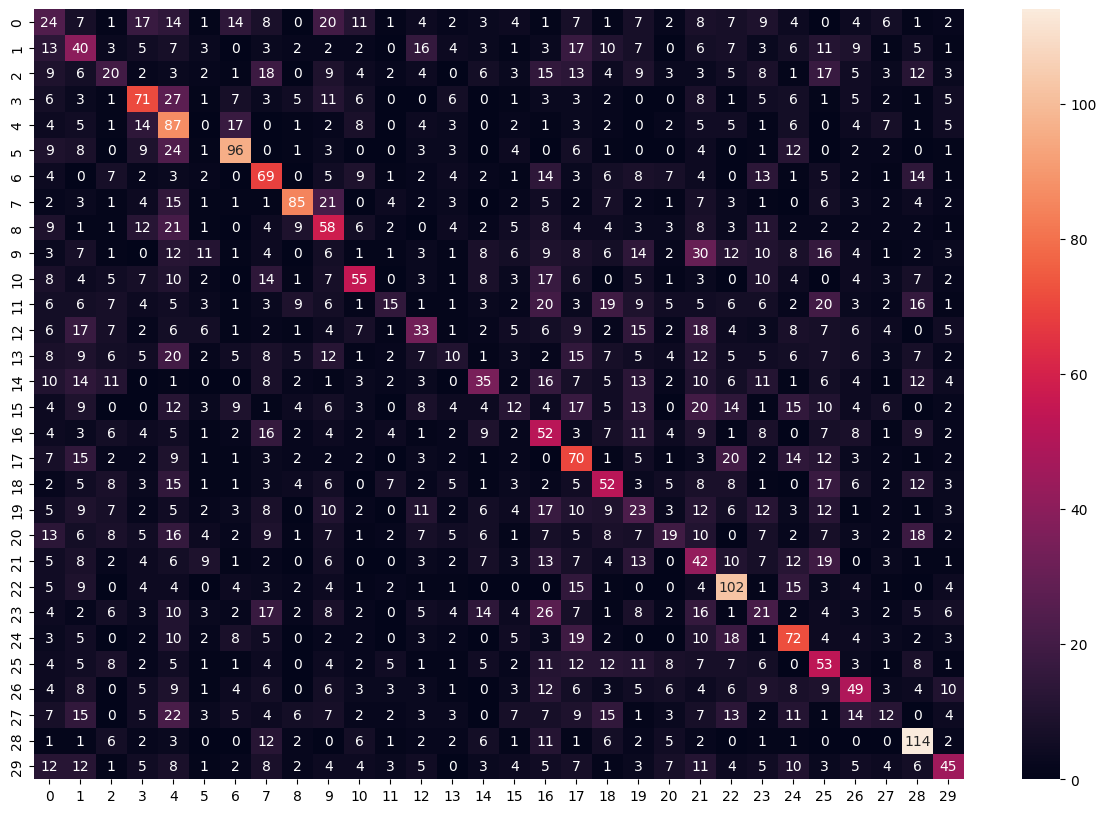

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(result,annot=True, fmt='g')